Alunos:
- Ruan Tenório de Melo
- Victor Hugo Silva Ângelo
- Vinícius da Costa  Netizke

## Problema das Tintas
---


Uma empresa de tintas produz 2 tipos de tinta: a de secagem rápida (SR) e a de
secagem normal (SN). Ambas usam os mesmos componente, variando apenas a
proporção. Os componentes são: componente de secagem (SEC) e o componente
de cor (COR). A empresa tem a disposição para a compra duas misturas para
compor as tintas:

- Solução A (SolA) com 30% de SEC e 70% de COR a R$ 1,5 o litro.

- Solução B (Solb) com 60% de SEC e 40% de COR a R$ 1,0 o litro.

Além disso, a empresa tem a disposição também:

- Comp. SEC a R$ 4,0 o litro

- Comp. COR a R$ 6,0 o litro

Sabendo que para compor SR temos que ter no mínimo 25% de SEC e no mínimo
50% de COR. Já para SN temos que ter no mínimo de 20% de SEC e 50% de COR.
Qual a quantidade de produtos (SolA, SolB, SEC, COR) a serem comprados para se
produzir 1000 litro de SR e 250 litros de SN com **menor custo**?


## Explicação


---



### Cromossomo
---

O cromossomo será um array com as quantidades de cada componente em litros.

`[Quantidade de solA, Quantidade de solB, Quantidade de sec, Quantidade de cor]`

### Fitness



---


Para o fitness é preciso pegar as restrições passadas no problema:

Restrições para **SR**:

- Restrição para SEC: 0.3 * solA_SR + 0.6 * solB_SR + sec_SR <= 25% * 1000
- Restrição para COR: 0.7 * solA_SR + 0.4 * solB_SR + cor_SR <= 50% * 1000

Restrições para **SN**:

- Restrição para SEC: 0.3 * solA_SN + 0.6 * solB_SN + sec_SN <= 20% * 250
- Restrição para COR: 0.7 * solA_SN + 0.4 * solB_SN + cor_SN <= 50% * 250

Veja que nosso cromossomo tem apenas solA, solB, sec e cor. Logo, pode-se dizer que:

- solA = solA_SR + solA_SN
- solB = solB_SR + solB_SN
- sec  = sec_SR  +  sec_SN
- cor  = cor_SR  +  cor_SN

Então, tem-se as novas restrições:

- Restrição para SEC: 0.3 * (solA_SR + solA_SN) + 0.6 * (solB_SR + solB_SN) + (sec_SR + sec_SN) <= 25% * 1000 + 20% * 250
- Restrição para COR: 0.7 * (solA_SR + solA_SN) + 0.4 * (solB_SR + solB_SN) + (sec_SR + sec_SN) <= 50% * 1000 + 50% * 250

Veja que esses são as porcentagens minímas para produzir a quantidade. Porém, a questão pede para produzir 1000 litros de SR e 250 litros de SN, logo é preciso de uma restrição para total de litros:

- solA + solB + sec + cor < 1250

Veja que a questão pede para produzir a 1000 litros de SR e 250 litros de SN, porém, caso ultrapasse é o custo mínimo é calculado por:

- solA * 1.5 + solB * 1.0 + sec * 4.0 + cor * 6.0

Outro ponto importante é que o cromossomo não pode ter valores negativos, então as restrições são:

- solA < 0
- solB < 0
- sec  < 0
- cor  < 0

Para cada restrição existe é somado na variável de penalidade um valor de `99999`.

Com isso, o calculado do fitness é `solA * 1.5 + solB * 1.0 + sec * 4.0 + cor * 6.0 + penalty`

### População

---

A população inicial está sendo criada na linha:

`population = [np.random.uniform(1, 10000, 4) for _ in range(pop_size)]`

Para modificar basta passar o tamanho diferente na função `genetic_algorithm` no parametro `pop_size` e o padrão é de 50 cromossomos.

### Crossover
---

A ideia do cruzamento é utilizar a aritmética nos parentes, no caso é a soma das partes dos parentes através de um `alpha` (padrão 0.5). A função gera 2 filhos.

**Aritmética**

- filho1 = (1 - alpha) * parente1 + alpha * parente2

- filho2 = alpha * parente1 + (1 - alpha) * parente2

Além disso, existe um taxa para acontecer os cruzamentos (parametro `rate`) e o padrão é 80%.

Importante mecionar que esse tipo de cruzamento ele tem um limite máximo e limite mínimo, então pode cair em casos de respostas locais, logo é necessário  uma mutação.

### Mutação


---

Na mutação é sorteado um valor para fazer quantas multações [1, 4], depois escolhe mais de uma das 4 variáveis para ser aplicado um valor aleatorio nela para tenta sair da resposta local.

- Pegando o index aleatoriamente: `index = random.randint(0, 3)`

- Criando a taxa da mutação: `mutation = random.uniform(-50, 50)`

- Aplicando na solução a taxa: `solution[index] = solution[index] + mutation`

Além disso, existe um taxa para acontecer as mutações (parametro `rate`) e o padrão é 80%. Durante os experimentos a configuração que performou melhor foi a que teve mais mutações.

### Seleção e substituição


---

Essa etapa está no `genetic_algorithm`, no caso é escolhido os 10 melhores da população e o resto é substituito pela selação de torneio para o cruzamento e as mutações. Primeiro é ordenado a população em relação ao fitness. Após isso,

Elitismo (variável `el` define o limite): `new_population = population[:el]`

Escolhendo os individuos para substituir:  `parent1, parent2 = random.sample(population[:rand], 2)`

Adicionando os valores: `new_population.append(mutate(child1, rate_mut))`

Substituindo os valores: `population = new_population`


## Implementação


---



In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_graph(y1, y2, gen):
  plt.figure(figsize=(12, 8))

  plt.subplot(1, 2, 1)
  plt.plot(gen, y1, color="b")
  plt.title("Custo mínimo")
  plt.xlabel("Geração")
  plt.ylabel("Custo")

  plt.subplot(1, 2, 2)
  plt.plot(gen, y2, color="r")
  plt.title("Média dos custo")
  plt.xlabel("Geração")
  plt.ylabel("Custo")

  plt.tight_layout()
  plt.show()

In [ ]:
def create_ink(solution):
  solA, solB, sec, cor = solution

  total_sec = 0.3 * solA + 0.6 * solB + sec
  total_cor = 0.7 * solA + 0.4 * solB + cor

  return sum(solution), total_sec, total_cor

In [ ]:
def fitness(solution):

    penalty = 0

    for s in solution:
      if s < 0:
        penalty += 9999

    sum_litros, total_sec, total_cor = create_ink(solution)

    if (int(sum_litros) < 1250):
      penalty += 9999

    if (int(total_sec) < 300):
        penalty += 9999

    if (int(total_cor) < 625):
        penalty += 9999



    solA, solB, sec, cor = solution

    return solA * 1.5 + solB * 1.0 + sec * 4.0 + cor * 6.0 + penalty

In [ ]:
def mutate(solution, rate=0.8):
  if random.random() < rate:

    n = random.randint(1, 4)

    for i in range(n):
      index = random.randint(0, 3)
      mutation = random.uniform(-50, 50)
      solution[index] = solution[index] + mutation

  return solution

In [ ]:
def arithmetic_crossover(parent1, parent2, alpha=0.5, rate=0.8):
  if random.random() < rate:
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = (1 - alpha) * parent1 + alpha * parent2
    return child1, child2
  else:
    return parent1, parent2

In [ ]:
def genetic_algorithm(pop_size=50, generations=1000, el=10, rand=20, rate_cross=0.5, rate_mut=0.5):

    pop_size = int(pop_size)
    generations = int(generations)
    el = int(el)
    rand = int(rand)

    if pop_size < el or pop_size < rand:
        print("O tamanho da população deve ser maior que o número do elitismo (el) e do numero de escolha dos pais (rand)!")
        return [], 0


    population = [np.random.uniform(1, 10000, 4) for _ in range(pop_size)] #criando a população

    best_costs = []
    mean_costs = []

    for _ in range(generations):
        population = sorted(population, key=fitness)
        new_population = population[:el] # escolhendo os melhores individuos para fazer substituição

        while len(new_population) < pop_size:
            parent1, parent2 = random.sample(population[:rand], 2) # escolhendo os individuos da população
            child1, child2 = arithmetic_crossover(parent1, parent2, random.random(), rate_cross)
            new_population.append(mutate(child1, rate_mut))
            new_population.append(mutate(child2, rate_mut))

        population = new_population #substituição
        best_costs.append(fitness(sorted(population, key=fitness)[0]))

        mean_cost = 0
        for individual in population:
          mean_cost += fitness(individual)

        mean_costs.append(mean_cost/pop_size)

    plot_graph(best_costs, mean_costs, range(1, generations + 1))

    best_solution = sorted(population, key=fitness)[0]
    return best_solution, fitness(best_solution)

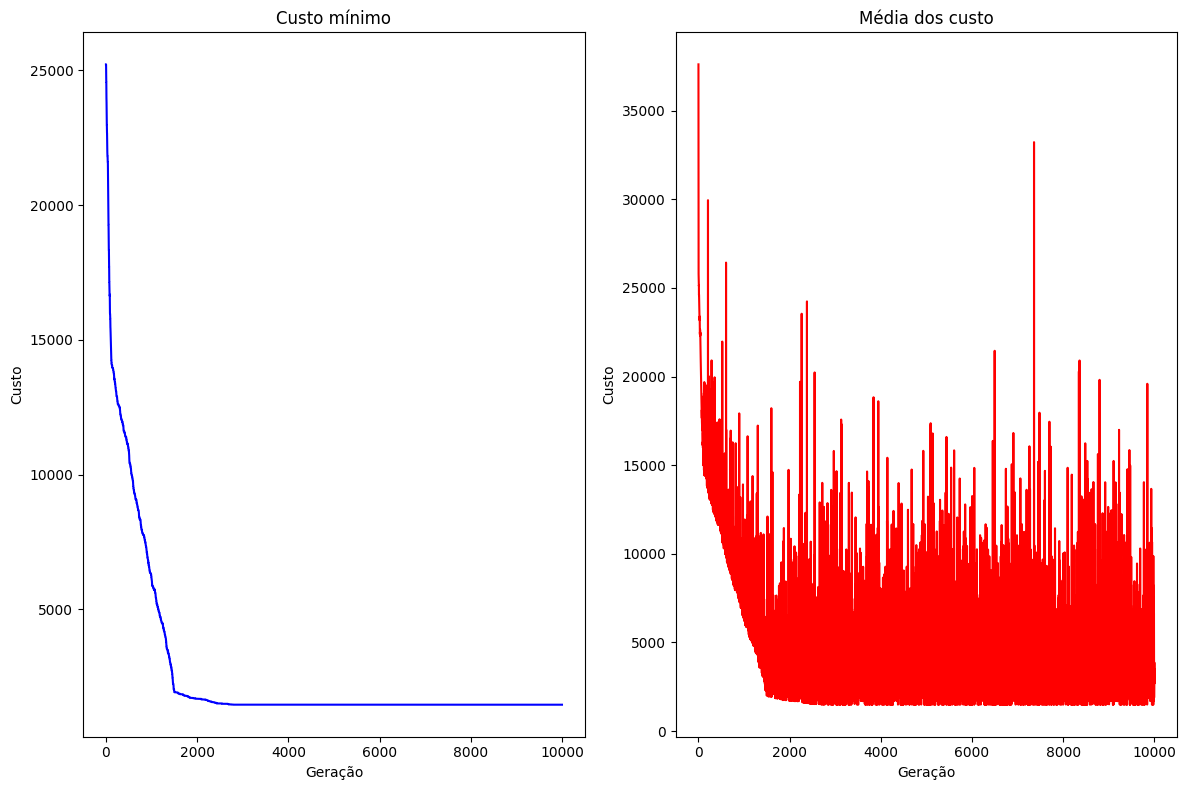

In [ ]:
best_sol, best_cost = genetic_algorithm(pop_size=50, generations=10000, el=5, rand=10, rate_cross=0.85, rate_mut=0.1)

In [ ]:
print(f"Melhor solução encontrada aproximadamente:\n")
print(f"solA - {int(best_sol[0])}\nsolB - {int(best_sol[1])}\nSEC - {int(best_sol[2])}\nCOR - {int(best_sol[3])}\n")
print(f"Custo mínimo: {best_cost:.2f}")

sum_litros, total_sec, total_cor = create_ink(best_sol)
print(f"\nTotal de litros: {int(sum_litros)}\nTotal de litros - SEC: {int(total_sec)}\nTotal de litros - COR: {int(total_cor)}")

Melhor solução encontrada aproximadamente:

solA - 415
solB - 834
SEC - 0
COR - 0

Custo mínimo: 1458.55

Total de litros: 1250
Total de litros - SEC: 625
Total de litros - COR: 625
